In [55]:
import arviz as az
import os.path as op
import seaborn as sns
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
az.rcParams["data.load"] = 'eager'

In [57]:
bids_folder = '/data/ds-risk'

In [63]:
df = []
keys = []
rois = ['dmidbrain', 'lc', 'vtav2', 'sncv2', 'meynert'][1:]
# rois = ['vtav2', 'sncv2', 'lc']
pars =['n1_evidence_sd_mu', 'n2_evidence_sd_mu', 'risky_prior_mu_mu', 'risky_prior_std_mu', 'safe_prior_mu_mu', 'safe_prior_std_mu'] 

for mask, parameter in product(rois, pars):
    idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/ses-7t2_model-subcortical_response1.pca_{mask}_trace.netcdf')
    df.append(idata.posterior[parameter].to_dataframe().xs(mask, 0, -1)[parameter])
    keys.append((mask.replace('v2', ''), parameter))

df = pd.concat(df, keys=keys, names=['mask', 'parameter']).to_frame('value')


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_50937/689784982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map(lambda x: x[1])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mask     Option
LC       1         0.151500
         2         0.299833
Meynert  1         0.135500
         2         0.271833
SNc      1         0.267167
         2         0.271500
VTA      1         0.369500
         2         0.064167
dtype: float64

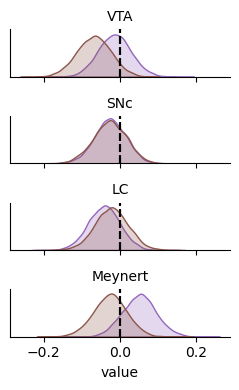

In [64]:
evidence_sd = df.loc[(slice(None), ['n1_evidence_sd_mu', 'n2_evidence_sd_mu']), :]

evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map(lambda x: x[1])
evidence_sd = evidence_sd.reset_index()
evidence_sd['mask'] = evidence_sd['mask'].map({'vta':'VTA', 'lc':'LC', 'snc':'SNc', 'meynert':'Meynert', 'dmidbrain': 'DopaminergicMidbrain'})


order = ['DopaminergicMidbrain', 'VTA', 'SNc', 'LC', 'Meynert'][1:]


fac = sns.FacetGrid(evidence_sd, hue='Option', row_order=order, hue_order=['1', '2'], row='mask', palette=sns.color_palette()[4:], aspect=2.5, height=1.)

fac.set(xlabel=None, ylabel=None, yticks=[])
plt.legend(title='Option')

fac.map(sns.kdeplot, 'value', fill=True)
fac.set_titles('{row_name}')

fac.map(lambda *args,**kwargs: plt.axvline(0.0, c='k', ls='--'))



plt.savefig('/data/ds-risk/derivatives/figures/subcortical_evidence_sd.pdf')

evidence_sd.groupby(['mask', 'Option']).apply(lambda d: np.min(((d['value'] > 0.0).mean(), (1 - (d['value']>0.0).mean()))))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_50937/3823247389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prior_mu['Option'] = prior_mu.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mask     Option
LC       Risky     0.240167
         Safe      0.369167
Meynert  Risky     0.415333
         Safe      0.407000
SNc      Risky     0.443667
         Safe      0.364833
VTA      Risky     0.438500
         Safe      0.412833
dtype: float64

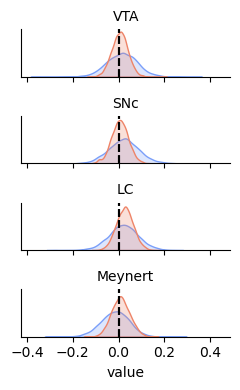

In [65]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

prior_mu = df.loc[(slice(None), ['risky_prior_mu_mu', 'safe_prior_mu_mu']), :]

prior_mu['Option'] = prior_mu.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})
prior_mu = prior_mu.reset_index()
prior_mu['mask'] = prior_mu['mask'].map({'vta':'VTA', 'lc':'LC', 'snc':'SNc', 'meynert':'Meynert'})


fac = sns.FacetGrid(prior_mu, hue='Option', row='mask', row_order=order, hue_order=['Safe', 'Risky'], palette=palette, aspect=2.5, height=1.)

fac.set(xlabel=None, ylabel=None, yticks=[])
plt.legend(title='Option')

fac.map(sns.kdeplot, 'value', fill=True)
fac.set_titles('{row_name}')

fac.map(lambda *args,**kwargs: plt.axvline(0.0, c='k', ls='--'))


plt.savefig('/data/ds-risk/derivatives/figures/subcortical_prior_mu.pdf')

prior_mu.groupby(['mask', 'Option']).apply(lambda d: np.min(((d['value'] > 0.0).mean(), (1 - (d['value']>0.0).mean()))))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_50937/2634917304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prior_std['Option'] = prior_std.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mask     Option
LC       Risky     0.454000
         Safe      0.417333
Meynert  Risky     0.474833
         Safe      0.378500
SNc      Risky     0.344500
         Safe      0.307667
VTA      Risky     0.107500
         Safe      0.297333
dtype: float64

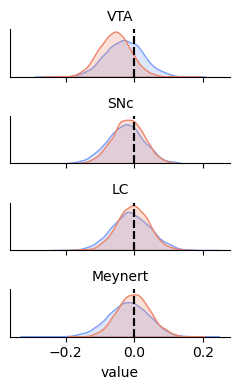

In [66]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

prior_std = df.loc[(slice(None), ['risky_prior_std_mu', 'safe_prior_std_mu']), :]

prior_std['Option'] = prior_std.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})
prior_std = prior_std.reset_index()
prior_std['mask'] = prior_std['mask'].map({'vta':'VTA', 'lc':'LC', 'snc':'SNc', 'meynert':'Meynert'})


fac = sns.FacetGrid(prior_std, hue='Option', row='mask', row_order=order, hue_order=['Safe', 'Risky'],  palette=palette, aspect=2.5, height=1.)

fac.set(xlabel=None, ylabel=None, yticks=[])
plt.legend(title='Option')

fac.map(sns.kdeplot, 'value', fill=True)
fac.set_titles('{row_name}')

fac.map(lambda *args,**kwargs: plt.axvline(0.0, c='k', ls='--'))

plt.savefig('/data/ds-risk/derivatives/figures/subcortical_prior_std.pdf')

prior_std.groupby(['mask', 'Option']).apply(lambda d: np.min(((d['value'] > 0.0).mean(), (1 - (d['value']>0.0).mean()))))

# Prestim

In [43]:
df = []
keys = []
rois = ['dmidbrain', 'lc', 'vtav2', 'sncv2', 'meynert'][1:]
pars =['n1_evidence_sd_mu', 'n2_evidence_sd_mu', 'risky_prior_mu_mu', 'risky_prior_std_mu', 'safe_prior_mu_mu', 'safe_prior_std_mu'] 

for mask, parameter in product(rois, pars):
    idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/ses-7t2_model-subcortical_prestim.pca_{mask}_trace.netcdf')
    df.append(idata.posterior[parameter].to_dataframe().xs(mask, 0, -1)[parameter])
    keys.append((mask.replace('v2', ''), parameter))

df = pd.concat(df, keys=keys, names=['mask', 'parameter']).to_frame('value')


In [44]:
df.index.unique(level='mask')

Index(['lc', 'vta', 'snc', 'meynert'], dtype='object', name='mask')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_50937/4193326161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map(lambda x: x[1])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mask     Option
LC       1         0.413833
         2         0.314667
Meynert  1         0.132167
         2         0.399667
SNc      1         0.057167
         2         0.137667
VTA      1         0.267000
         2         0.262500
dtype: float64

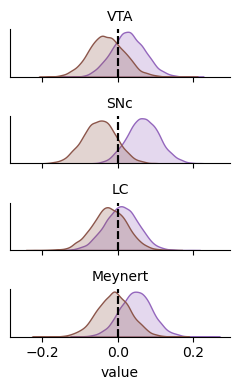

In [45]:
evidence_sd = df.loc[(slice(None), ['n1_evidence_sd_mu', 'n2_evidence_sd_mu']), :]

evidence_sd['Option'] = evidence_sd.index.get_level_values('parameter').map(lambda x: x[1])
evidence_sd = evidence_sd.reset_index()
evidence_sd['mask'] = evidence_sd['mask'].map({'vta':'VTA', 'lc':'LC', 'snc':'SNc', 'meynert':'Meynert', 'dmidbrain': 'DopaminergicMidbrain'})


order = ['DopaminergicMidbrain', 'VTA', 'SNc', 'LC', 'Meynert'][1:]


fac = sns.FacetGrid(evidence_sd, hue='Option', row_order=order, hue_order=['1', '2'], row='mask', palette=sns.color_palette()[4:], aspect=2.5, height=1.)

fac.set(xlabel=None, ylabel=None, yticks=[])
plt.legend(title='Option')

fac.map(sns.kdeplot, 'value', fill=True)
fac.set_titles('{row_name}')

fac.map(lambda *args,**kwargs: plt.axvline(0.0, c='k', ls='--'))



plt.savefig('/data/ds-risk/derivatives/figures/subcortical_prestim_evidence_sd.pdf')

evidence_sd.groupby(['mask', 'Option']).apply(lambda d: np.min(((d['value'] > 0.0).mean(), (1 - (d['value']>0.0).mean()))))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_50937/4123310472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prior_mu['Option'] = prior_mu.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mask     Option
LC       Risky     0.115667
         Safe      0.258667
Meynert  Risky     0.189333
         Safe      0.353167
SNc      Risky     0.144333
         Safe      0.170833
VTA      Risky     0.109833
         Safe      0.281167
dtype: float64

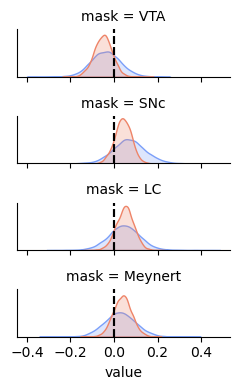

In [46]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

prior_mu = df.loc[(slice(None), ['risky_prior_mu_mu', 'safe_prior_mu_mu']), :]

prior_mu['Option'] = prior_mu.index.get_level_values('parameter').map({'risky_prior_mu_mu':'Risky', 'safe_prior_mu_mu':'Safe'})
prior_mu = prior_mu.reset_index()
prior_mu['mask'] = prior_mu['mask'].map({'vta':'VTA', 'lc':'LC', 'snc':'SNc', 'meynert':'Meynert'})


fac = sns.FacetGrid(prior_mu, hue='Option', row='mask', row_order=order, palette=palette, hue_order=['Safe', 'Risky'], aspect=2.5, height=1.)

fac.set(xlabel=None, ylabel=None, yticks=[])
plt.legend(title='Option')

fac.map(sns.kdeplot, 'value', fill=True)
# fac.set_titles('{row_name}')

fac.map(lambda *args,**kwargs: plt.axvline(0.0, c='k', ls='--'))

plt.savefig('/data/ds-risk/derivatives/figures/subcortical_prestim_prior_mu.pdf')

prior_mu.groupby(['mask', 'Option']).apply(lambda d: np.min(((d['value'] > 0.0).mean(), (1 - (d['value']>0.0).mean()))))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_50937/2243260745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prior_std['Option'] = prior_std.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mask     Option
LC       Risky     0.136333
         Safe      0.463167
Meynert  Risky     0.429167
         Safe      0.225333
SNc      Risky     0.379500
         Safe      0.314000
VTA      Risky     0.360833
         Safe      0.422333
dtype: float64

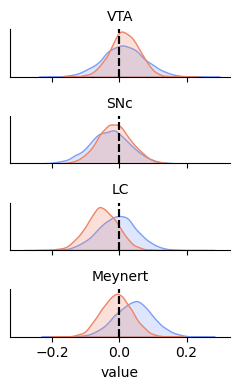

In [47]:
palette = sns.color_palette('coolwarm', 4)
palette = [palette[ix] for ix in [0, 3]]

prior_std = df.loc[(slice(None), ['risky_prior_std_mu', 'safe_prior_std_mu']), :]

prior_std['Option'] = prior_std.index.get_level_values('parameter').map({'risky_prior_std_mu':'Risky', 'safe_prior_std_mu':'Safe'})
prior_std = prior_std.reset_index()
prior_std['mask'] = prior_std['mask'].map({'vta':'VTA', 'lc':'LC', 'snc':'SNc', 'meynert':'Meynert'})


fac = sns.FacetGrid(prior_std, hue='Option', row='mask', row_order=order, palette=palette, hue_order=['Safe', 'Risky'], aspect=2.5, height=1.)

fac.set(xlabel=None, ylabel=None, yticks=[])
plt.legend(title='Option')

fac.map(sns.kdeplot, 'value', fill=True)
fac.set_titles('{row_name}')

fac.map(lambda *args,**kwargs: plt.axvline(0.0, c='k', ls='--'))

plt.savefig('/data/ds-risk/derivatives/figures/subcortical_prestim_prior_std.pdf')

prior_std.groupby(['mask', 'Option']).apply(lambda d: np.min(((d['value'] > 0.0).mean(), (1 - (d['value']>0.0).mean()))))